## Concavity study

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from math import log, e

$$M_{ij} = \dfrac{\sum_{k = 1}^n (e^{j_k - k_{max}} - e^{k_i - k_{max}})*e^{j_k - k_{max}}}{\sum_{k = 1}^N e^{j_k - k_{max}}}$$

In [12]:
companies_weights = list(map(
    lambda x: { "company": x, "weights": x, "candidates_merits": [] },
    variables
))
for company in companies_weights:
    for candidate in companies_weights:
        numerator = merit(candidate['weights'], company['weights'])
        company["candidates_merits"].append(numerator)

In [6]:
def merit(candidate=(), company=()):
    result = 0
    for can, com in zip(candidate, company):
        result += (m(can["v"], can["r"]) - m(com["v"], com["r"]))*m(com["v"], com["r"])
    return result / sum([m(com["v"], com["r"]) for com in company])

In [7]:
def difficulty_level(*attrs):
    result = 0
    for attr in attrs:
        result += m(attr["v"], attr["r"])
    return result

In [12]:
m = lambda x, r: (e)**(x-r)
#m = lambda x, r: x/r
#m = lambda x: ((-(x-3)**2 + 9)**0.5)/3
#m = lambda x: (x/4) + 0.25
#m = lambda x: ((3*x)**0.5)/3
#m = lambda x: log(x+1, 4)

In [9]:
def plot_percentage_ds(variables):
    return list(map(
        lambda com: {
            "difficulty_level": [difficulty_level(*com), com],
            "merits": filter_above(variables, com)
        },
        variables
    ))
    

def filter_above(candidates, company):
    results = []
    for candidate in candidates:
        _merit = merit(candidate, company)
        if _merit >= 0:
            results.append([_merit, candidate])
    return results

In [13]:
variables = list(itertools.product([
    {"v": 0, "r": 2}, 
    {"v": 1, "r": 2}, 
    {"v": 2, "r": 2}, 
    {"v": 0, "r": 5}, 
    {"v": 1, "r": 5}, 
    {"v": 2, "r": 5},
    {"v": 3, "r": 5}, 
    {"v": 4, "r": 5},
    {"v": 5, "r": 5},
    {"v": 0, "r": 8}, 
    {"v": 1, "r": 8}, 
    {"v": 2, "r": 8}, 
    {"v": 3, "r": 8}, 
    {"v": 4, "r": 8}, 
    {"v": 5, "r": 8}, 
    {"v": 6, "r": 8}, 
    {"v": 7, "r": 8}, 
    {"v": 8, "r": 8}, 
], repeat=3))

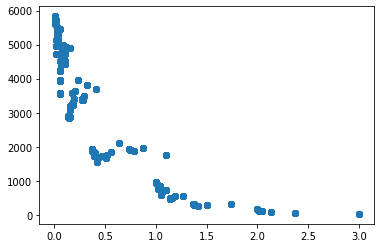

In [14]:
plot_difs = plot_percentage_ds(variables)
    
x = [_x['difficulty_level'][0] for _x in plot_difs]
y = [len(_x['merits']) for _x in plot_difs]
    
plt.scatter(x, y, marker='o')
#for x_, y_ in zip(x, y):
    #plt.text(x_, y_, str(x_)[:4] + '-' + str(y_))

## Analysis

You may ask yourself "but how can a company with a higher difficulty level accept more candidates than one with a lower difficulty level?" (check the case of company with 0.37 difficulty accepting 8 candidates whereas one with a 0.44 accepting 9). Well, it does indeed sound counter intuitive, however, it can be logically explained, the reason lies behind the fact of knowledge weight. 

If a company wants the candidate to know at least level 0 of a certain attribute, it means that the company does not care at all which knowledge level the candidate has, regardless of how high it is, it won't be valued, so the candidade has to work harder on other attributes to achieve a higher value on them, thus making it harder to be accepted. On the case of a company with a slighly above difficulty level, that same attribute the latter company requested is now being wanted at level 1, which impacts the candidade knowledge value. Knowning more or the same as 1 is a bit easy, and the value associated with it eases the difficulty of being accepted, because the other attributes don't need to be super high.

## Plot

#### Colorful

In [17]:
merits = np.array(list(map(lambda x: x["candidates_merits"], companies_weights)))
merits

array([[ 0.        ,  0.07751472,  0.28822157, ...,  0.57644314,
         0.65395786,  0.86466472],
       [-0.13397262,  0.        ,  0.36417533, ...,  0.23254416,
         0.36651677,  0.7306921 ],
       [-0.68047906, -0.49747006,  0.        , ..., -0.49629341,
        -0.3132844 ,  0.18418565],
       ...,
       [-0.80986319, -0.79512478, -0.75506165, ...,  0.        ,
         0.0147384 ,  0.05480153],
       [-0.76645695, -0.73032833, -0.63212056, ..., -0.03612862,
         0.        ,  0.09820777],
       [-0.86466472, -0.78715   , -0.57644314, ..., -0.28822157,
        -0.21070685,  0.        ]])

#### Binary

In [80]:
merits = np.array(list(map(
    lambda x: list(map(lambda y: 1 if y >= 0 else 0, x["candidates_merits"])),
    companies_weights
)))

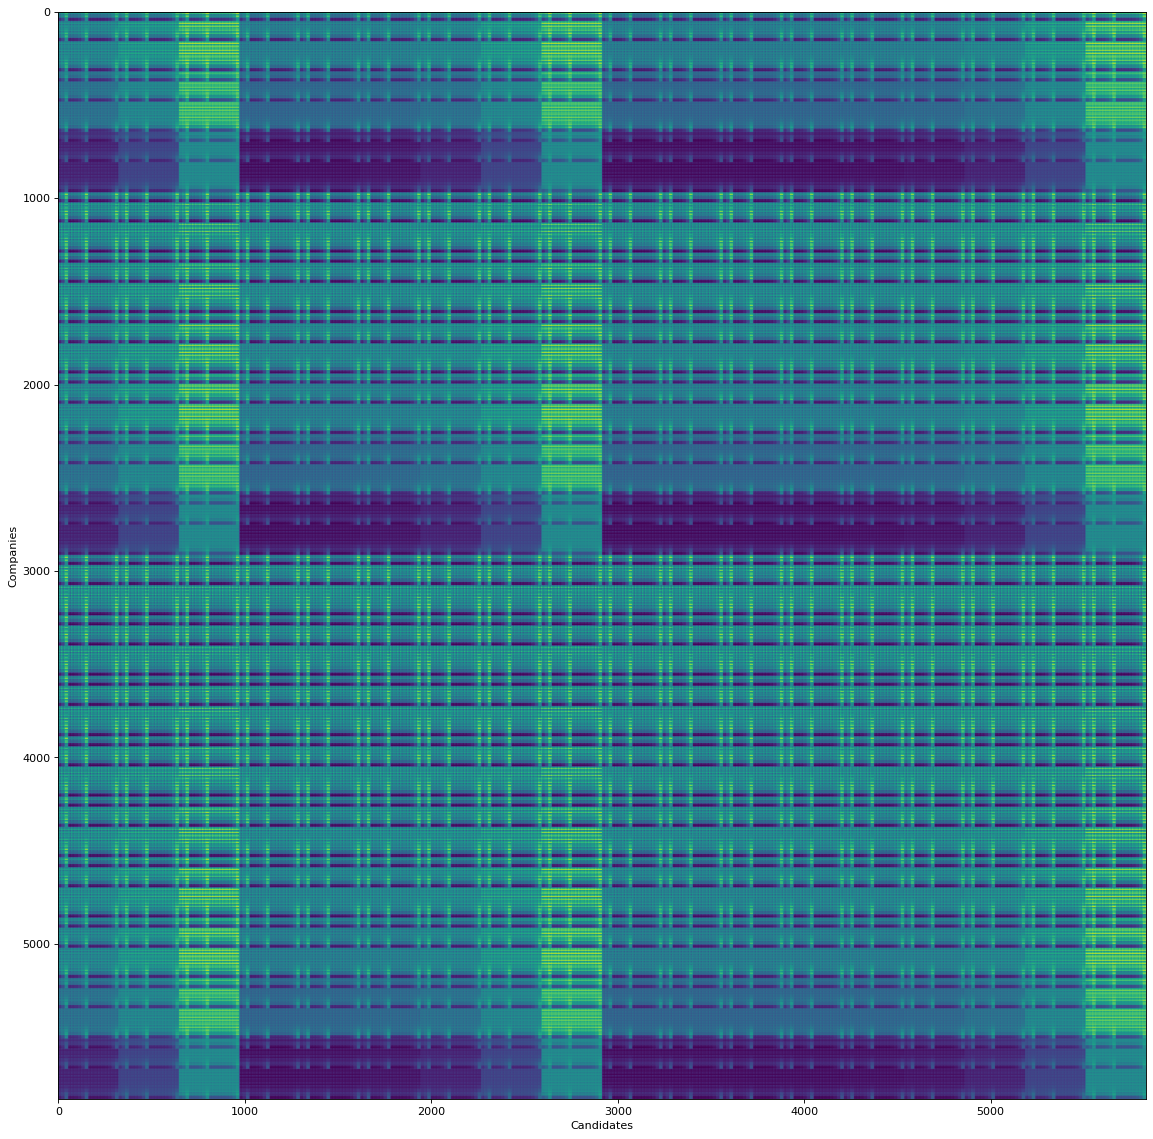

In [16]:
companies = candidates = variables

fig, ax = plt.subplots(figsize=(24, 18), dpi=80)
im = ax.imshow(merits)

ax.set_xlabel('Candidates')
ax.set_ylabel('Companies')

#ax.set_xticks(np.arange(len(candidates)))
#ax.set_yticks(np.arange(len(companies)))

#ax.set_xticklabels(candidates, fontsize=6)
#ax.set_yticklabels(companies, fontsize=6)

#plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Running the commented code causes an error when the svg is opened
#for i in range(len(companies)):
#    for j in range(len(candidates)):
#        ax.annotate(merits_colorful[i, j], (j, i), fontsize=0.5)
plt.show()
#plt.savefig('result-binary-4.svg', format='svg', dpi=1200)